# Rent Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Rent_Contracts.csv')

selected_columns = [
    'contract_start_date',
    'contract_end_date',
    'contract_amount',
    'ejari_property_type_en',
    'property_usage_en',
    'project_name_en',
    'area_id',
    'area_name_en'
]

df = df[selected_columns]

df.head()

,contract_start_date,contract_end_date,contract_amount,ejari_property_type_en,property_usage_en,project_name_en,area_id,area_name_en
0,07-04-2019,06-04-2020,85000,Office,Commercial,EMPIRE HEIGHTS,526.0,Business Bay
1,20-04-2019,19-04-2020,110000,Villa,Residential,NaN,442.0,Al Barsha South Fifth
2,11-04-2019,10-04-2020,100000,Villa,Residential,REEM - MIRA OASIS COMMUNITY,506.0,Al Yelayiss 1
3,18-03-2019,17-03-2020,150000,Villa,Residential,ARABIAN RANCHES - PALMA COMMUNITY,463.0,Wadi Al Safa 7
4,15-04-2019,14-04-2020,95000,Flat,Residential,NaN,330.0,Marsa Dubai


In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df['contract_start_date'] = pd.to_datetime(df['contract_start_date'],  format='%d-%m-%Y', errors='coerce')

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2025-12-31')

filtered_df = df[(df['contract_start_date'] >= start_date) & 
                 (df['contract_start_date'] <= end_date)]

print(f"Original dataset: {len(df)} rows")
print(f"Filtered dataset (2020-2025): {len(filtered_df)} rows")
print(f"Removed {len(df) - len(filtered_df)} rows")

print(f"Earliest date: {filtered_df['contract_start_date'].min()}")
print(f"Latest date: {filtered_df['contract_start_date'].max()}")

filtered_df.head()

Original dataset: 8731772 rows
Filtered dataset (2020-2025): 4765307 rows
Removed 3966465 rows
Earliest date: 2020-01-01 00:00:00
Latest date: 2025-12-31 00:00:00


,contract_start_date,contract_end_date,contract_amount,ejari_property_type_en,property_usage_en,project_name_en,area_id,area_name_en
8972,2020-02-01,31-01-2022,340000,Villa,Residential,NaN,352.0,Al Thanayah Fourth
10673,2020-06-04,03-06-2021,130000,Villa,Residential,Emirates Living - Springs 15,352.0,Al Thanayah Fourth
22731,2020-01-02,01-01-2029,9000,Warehouse,Commercial,NaN,376.0,Ras Al Khor Industrial First
28036,2020-01-17,16-01-2021,36000,Shop,Commercial,NaN,391.0,Al Lusaily
29383,2020-02-01,31-01-2021,57000,Flat,Residential,NaN,271.0,Al Karama


# NULL Handling

Removing rows with missing area_name here to focus on neighbourhoods

In [5]:
processed_df = filtered_df.dropna().reset_index()

print(f"Original dataset: {len(filtered_df)} rows")
print(f"After removing rows with missing area_name_en: {len(processed_df)} rows")
print(f"Removed {len(filtered_df) - len(processed_df)} rows")

Original dataset: 4765307 rows
After removing rows with missing area_name_en: 846853 rows
Removed 3918454 rows


In [6]:
processed_df.head()

,index,contract_start_date,contract_end_date,contract_amount,ejari_property_type_en,property_usage_en,project_name_en,area_id,area_name_en
0,10673,2020-06-04,03-06-2021,130000,Villa,Residential,Emirates Living - Springs 15,352.0,Al Thanayah Fourth
1,44876,2020-07-21,20-07-2021,49052,Office,Commercial,PLATINUM TOWER,350.0,Al Thanyah Fifth
2,47497,2021-05-01,30-04-2022,500000,Flat,Residential,THE 118,390.0,Burj Khalifa
3,50603,2020-02-23,22-02-2024,1549288,Shop,Commercial,THE RESIDENCES AT MARINA GATE 1,330.0,Marsa Dubai
4,51149,2020-01-01,31-12-2020,75000,Flat,Residential,CONCORDE TOWER,350.0,Al Thanyah Fifth


# Neighbourhood Statistics

In [7]:
def filter_by_minimum_value(df, column_name, min_value=1000):
    """
    Filter a DataFrame to remove rows where the specified column's values are less than the minimum value.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to filter
    column_name : str
        The name of the column to check
    min_value : numeric (int, float), default=1000
        The minimum value to keep
        
    Returns:
    --------
    pandas.DataFrame
        A new DataFrame with filtered rows
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    
    # Create a new DataFrame with rows where the column value is at least min_value
    filtered_df = df[df[column_name] >= min_value].copy()
    
    return filtered_df

# Example usage with processed_df and contract_amount column
# filtered_processed_df = filter_by_minimum_value(processed_df, 'contract_amount')

In [8]:
# Get the count of rows before filtering
original_count = len(processed_df)

# Apply the filter
filtered_processed_df = processed_df[processed_df['contract_amount'] >= 1000]

# Get the count of rows after filtering
filtered_count = len(filtered_processed_df)

# Calculate how many rows were deleted
deleted_count = original_count - filtered_count

# Calculate the percentage of rows deleted
deleted_percentage = (deleted_count / original_count) * 100 if original_count > 0 else 0

# Print the statistics
print(f"Original number of rows: {original_count}")
print(f"Rows after filtering: {filtered_count}")
print(f"Rows deleted: {deleted_count}")
print(f"Percentage of rows deleted: {deleted_percentage:.2f}%")

Original number of rows: 846853
Rows after filtering: 846536
Rows deleted: 317
Percentage of rows deleted: 0.04%


In [9]:
df1 = filtered_processed_df.drop(columns="index")

In [10]:
df1.head()

,contract_start_date,contract_end_date,contract_amount,ejari_property_type_en,property_usage_en,project_name_en,area_id,area_name_en
0,2020-06-04,03-06-2021,130000,Villa,Residential,Emirates Living - Springs 15,352.0,Al Thanayah Fourth
1,2020-07-21,20-07-2021,49052,Office,Commercial,PLATINUM TOWER,350.0,Al Thanyah Fifth
2,2021-05-01,30-04-2022,500000,Flat,Residential,THE 118,390.0,Burj Khalifa
3,2020-02-23,22-02-2024,1549288,Shop,Commercial,THE RESIDENCES AT MARINA GATE 1,330.0,Marsa Dubai
4,2020-01-01,31-12-2020,75000,Flat,Residential,CONCORDE TOWER,350.0,Al Thanyah Fifth


In [11]:
df1.to_csv("rent_data.csv", index=False)

# Buildings Data

In [12]:
buildings_df = pd.read_csv('Buildings.csv')

selected_columns = [
    'area_id',
    'area_name_en',
    'floors',
    'rooms',
    'swimming_pools',
    'elevators',
    'property_sub_type_en',
    'master_project_en',
    'project_name_en',
    'land_type_en'
]

buildings_df = buildings_df [selected_columns]
buildings_df.head()

/tmp/ipykernel_978721/2687407107.py:1: DtypeWarning: Columns (7,35,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings_df = pd.read_csv('Buildings.csv')


,area_id,area_name_en,floors,rooms,swimming_pools,elevators,property_sub_type_en,master_project_en,project_name_en,land_type_en
0,506,Al Yelayiss 1,2.0,3.0,NaN,NaN,Villa,NaN,REEM - MIRA OASIS COMMUNITY PHASE 3,Residential
1,462,Madinat Al Mataar,3.0,4.0,NaN,NaN,Villa,Dubai World Central,Golf Lane,Government Authorities
2,352,Al Thanayah Fourth,2.0,4.0,NaN,NaN,Villa,Meadows 6,NaN,Commercial
3,467,Wadi Al Safa 5,2.0,4.0,NaN,NaN,Villa,NaN,Villanova Amaranta 3,Commercial
4,469,Al Yufrah 1,2.0,3.0,NaN,NaN,Villa,NaN,The Valley - Velora 2,Residential


In [13]:
buildings_df['swimming_pools'] = buildings_df['swimming_pools'].notna().astype(int)

In [14]:
buildings_df['elevators'] = buildings_df['elevators'].notna().astype(int)

In [15]:
buildings_df.head()

,area_id,area_name_en,floors,rooms,swimming_pools,elevators,property_sub_type_en,master_project_en,project_name_en,land_type_en
0,506,Al Yelayiss 1,2.0,3.0,0,0,Villa,NaN,REEM - MIRA OASIS COMMUNITY PHASE 3,Residential
1,462,Madinat Al Mataar,3.0,4.0,0,0,Villa,Dubai World Central,Golf Lane,Government Authorities
2,352,Al Thanayah Fourth,2.0,4.0,0,0,Villa,Meadows 6,NaN,Commercial
3,467,Wadi Al Safa 5,2.0,4.0,0,0,Villa,NaN,Villanova Amaranta 3,Commercial
4,469,Al Yufrah 1,2.0,3.0,0,0,Villa,NaN,The Valley - Velora 2,Residential


In [16]:
df2 = buildings_df.dropna()
df2.head()
df2.to_csv("buildings_data.csv", index=False)

# Valuation

In [17]:
valuation_df = pd.read_csv('Valuation.csv')

selected_columns = [
    'area_id',
    'area_name_en',
    'instance_date',
    'actual_worth',
    'property_total_value'
]

df3 = valuation_df[selected_columns].dropna()
df3.head()


,area_id,area_name_en,instance_date,actual_worth,property_total_value
0,239,Al Baraha,30-04-2005,9750000.0,9750000.0
1,368,Al Barsha First,16-03-2009,39883500.0,39883500.0
2,319,Ras Al Khor Industrial Second,18-04-2004,4000000.0,4000000.0
3,369,Al Barsha Third,22-03-2006,3000000.0,3000000.0
4,378,Al Garhoud,08-05-2005,26208000.0,26208000.0


In [19]:
df3['annual_roi'] = df3['property_total_value'].apply(lambda x : x * 0.07)

In [21]:
df3.head()

,area_id,area_name_en,instance_date,actual_worth,property_total_value,annual_roi
0,239,Al Baraha,30-04-2005,9750000.0,9750000.0,682500.0
1,368,Al Barsha First,16-03-2009,39883500.0,39883500.0,2791845.0
2,319,Ras Al Khor Industrial Second,18-04-2004,4000000.0,4000000.0,280000.0
3,369,Al Barsha Third,22-03-2006,3000000.0,3000000.0,210000.0
4,378,Al Garhoud,08-05-2005,26208000.0,26208000.0,1834560.0


In [22]:
df3.to_csv("valuation_data.csv", index=False)

In [24]:
df3.columns

TypeError: 'Index' object is not callable

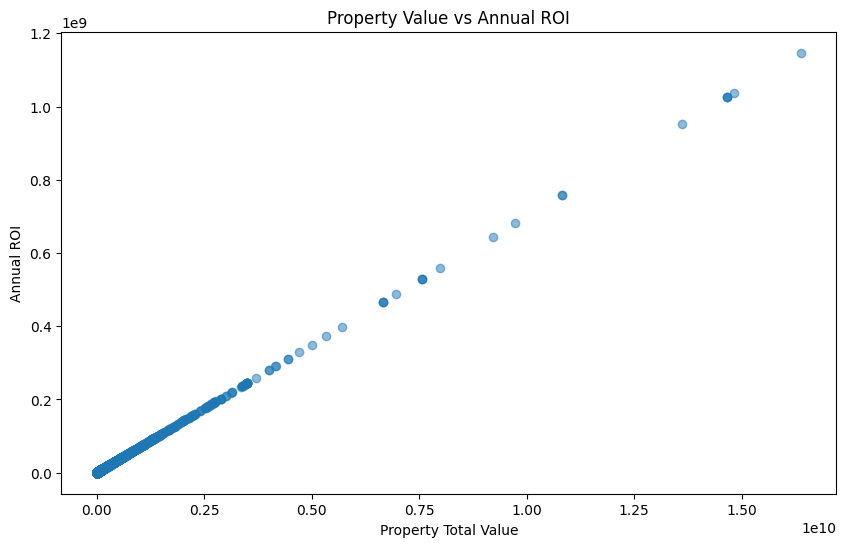

Coefficient (slope): 0.070000
Intercept: 0.000000
Mean Squared Error: 0.000000
R² Score: 1.000000


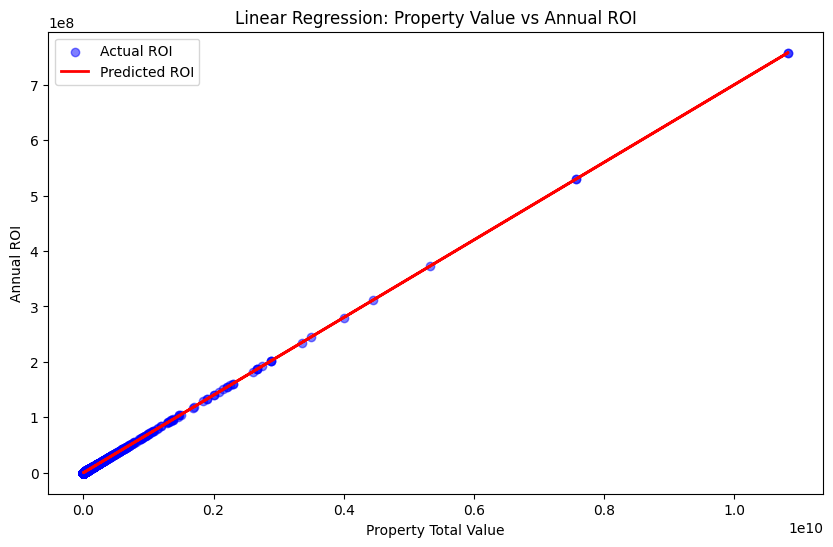

Predicted ROI for property value $500000: 35000.00%


/home/maveron/.conda/envs/estate-agnt/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your dataframe is loaded as df
df = pd.read_csv("valuation_data.csv")

# Let's visualize the relationship first
plt.figure(figsize=(10, 6))
plt.scatter(df['property_total_value'], df['annual_roi'], alpha=0.5)
plt.title('Property Value vs Annual ROI')
plt.xlabel('Property Total Value')
plt.ylabel('Annual ROI')
plt.show()

# Prepare features (X) and target (y)
X = df[['property_total_value']]  # Features in double brackets to keep as dataframe
y = df['annual_roi']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficient (slope): {model.coef_[0]:.6f}')
print(f'Intercept: {model.intercept_:.6f}')
print(f'Mean Squared Error: {mse:.6f}')
print(f'R² Score: {r2:.6f}')  # How much variance in ROI is explained by property value

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual ROI')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted ROI')
plt.title('Linear Regression: Property Value vs Annual ROI')
plt.xlabel('Property Total Value')
plt.ylabel('Annual ROI')
plt.legend()
plt.show()

# Function to predict future ROI
def predict_roi(property_value):
    return model.predict([[property_value]])[0]

# Example usage
example_value = 500000  # Example property value
predicted_roi = predict_roi(example_value)
print(f'Predicted ROI for property value ${example_value}: {predicted_roi:.2f}%')